In [1]:
import hes1_langevin_Antoine as langevin
import hes1_master_Antoine as master
import hes1_utils_Antoine as utils

import hes1_utils_general as general
import jochen_utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as spinter
import scipy.fft
import time
import datetime as dt
import os

import time

import warnings
warnings.filterwarnings("ignore")

# Simulation parameters

In [2]:
param_number = 1

In [3]:
if param_number==1:
    alpha_m=1
    alpha_p=1
    mu_m=0.03
    mu_p=0.03
    h=4.1
    P_0=10

    T=10000
    delta_t=0.01
    sampling_timestep = 10

    n_t=int(T/sampling_timestep)
    
    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[1,10,100,1000,10000]
    val_tau=[19.7]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)

elif param_number==2:
    alpha_m=39.93
    alpha_p=21.56
    mu_m=0.033
    mu_p=0.011
    h=4.78
    P_0=24201.01

    T=10000
    delta_t=0.01
    sampling_timestep = 10

    n_t=int(T/sampling_timestep)

    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[1,10]
    val_tau=[25,34]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)

else:
    print('Parameters not supported.')

# Save & Plots parameters

In [4]:
ratio=(1+np.sqrt(5))/2

In [5]:
date_and_time=time.localtime()
string_date=str(date_and_time.tm_year)+'-'+str(date_and_time.tm_mon)+'-'+str(date_and_time.tm_mday)+'-'+str(date_and_time.tm_hour)+'-'+str(date_and_time.tm_min)+'-'+str(date_and_time.tm_sec)
os.makedirs(os.getcwd() + '\\paper plots ' + string_date)

In [6]:
read_directory = os.getcwd() + '\\paper plots ' + string_date        #specify here the folder you want to use
#read_directory0 = '2023-12-10-15-25-10'
os.makedirs(read_directory + '\\plots')

In [7]:
font = {
    'family' : 'Arial',
    'color'  : 'black',
    'weight' : 'normal',
    'size'   : 10,
}

# Plotting power spectrum

In [ ]:
n_iter=100

In [ ]:
i=20
j=4
k=0

valueOfLambda = val_lambda[i]
valueOfOmega = val_Omega[j]
valueOfTau = val_tau[k]

#lambda_s = 100
#Omega = 1
#tau = 19.7

print("Value of lambda:", valueOfLambda)
print("Value of Omega:", valueOfOmega)
print("Value of tau:", valueOfTau)

In [ ]:
t0 = time.time()

output=general.simulate_master_all(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)

print("Computation time:", (time.time() - t0)//60, "min ", (time.time() - t0)%60, "s")


t_ref=output["times"]

freq_ref=output["frequencies"]


std_Mm=output["std Mm"]

std_Pm=output["std Pm"]

mean_Mm=output["mean Mm"]

mean_Pm=output["mean Pm"]

power_spectrum_Mm=output["power spectrum Mm"]
          
power_spectrum_Pm=output["power spectrum Pm"]

In [ ]:
output=general.simulate_langevin_all(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            
            
t_ref=output["times"]

freq_ref=output["frequencies"]


std_Ml=output["std Ml"]

std_Pl=output["std Pl"]

mean_Ml=output["mean Ml"]

mean_Pl=output["mean Pl"]

power_spectrum_Ml=output["power spectrum Ml"]
          
power_spectrum_Pl=output["power spectrum Pl"]

In [ ]:
output=general.simulate_lna_all(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            
            
t_ref=output["times"]

freq_ref=output["frequencies"]


std_Mlna=output["std Mlna"]

std_Plna=output["std Plna"]

mean_Mlna=output["mean Mlna"]

mean_Plna=output["mean Plna"]

power_spectrum_Mlna=output["power spectrum Mlna"]
          
power_spectrum_Plna=output["power spectrum Plna"]

In [ ]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Hes1 Power spectrum',fontdict=font) 
ax1.set_xlabel('Angular frequency',fontdict=font) 
ax1.set_ylabel('Power',fontdict=font) 



freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=valueOfLambda,
                                                tau=valueOfTau,
                                                Omega=valueOfOmega,
                                                T=T,
                                                delta_t=sampling_timestep)


linelna,=ax1.plot(freq_ref[1:], power_spectrum_Plna[1:], color = 'red', alpha = 0.2)
linet,=ax1.plot(freq_th[1:], Sp[1:], '--', color = 'black', alpha = 0.2)
linem,=ax1.plot(freq_ref[1:], power_spectrum_Pm[1:], color = 'blue')
linel,=ax1.plot(freq_ref[1:], power_spectrum_Pl[1:], color = 'green')

ax1.tick_params(axis ='y') 
ax1.set_yscale('log')        
ax1.legend([linem, linel, linelna, linet], ['Full model', 'Langevin model', 'LNA model', 'Theoretical LNA spectrum'])

ax1.set_xlim(0, 0.15)
ax1.set_ylim(10**(-2), 10**4)


plt.savefig(read_directory +'\\plots\\powerSpectrum-lambda'+str(val_lambda[i])[0:4]+'-Omega'+ str(val_Omega[j])
                                                                              +'-tau'  + str(val_tau[k])  +'.pdf')  
plt.show()

# Plotting STD

In [8]:
n_iter=10
T=20000

In [9]:
arr_std_Mm=np.zeros(n_lambda)
arr_std_Pm=np.zeros(n_lambda)

arr_std_Ml=np.zeros(n_lambda)
arr_std_Pl=np.zeros(n_lambda)

arr_std_Mlna=np.zeros(n_lambda)
arr_std_Plna=np.zeros(n_lambda)

In [10]:
j=4
k=0

for i in range(n_lambda):

    valueOfLambda = val_lambda[i]
    valueOfOmega = val_Omega[j]
    valueOfTau = val_tau[k]
    
    t0 = time.time()

    print("Value of lambda:", valueOfLambda)
    print("Value of Omega:", valueOfOmega)
    print("Value of tau:", valueOfTau)
    
    if valueOfLambda < 0.1:
        n_iter = 2
    elif valueOfLambda < 0.5:
        n_iter = 10
    elif valueOfLambda < 1:
        n_iter = 20
    else:
        n_iter = 50
        
    output=general.simulate_master_meanAndStd(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)

    arr_std_Mm[i]=output["std Mm"]
    arr_std_Pm[i]=output["std Pm"]

    output=general.simulate_langevin_meanAndStd(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            

    arr_std_Ml[i]=output["std Ml"]
    arr_std_Pl[i]=output["std Pl"]
    
    output=general.simulate_lna_meanAndStd(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            

    arr_std_Mlna[i]=output["std Mlna"]
    arr_std_Plna[i]=output["std Plna"]
    
    print("\n")
    print("n_iter = ", n_iter)
    print("Computation time: ", (time.time() - t0)//3600, "h ", ((time.time() - t0)//60)%60, "min ", (time.time() - t0)%60, "s")
    print("\n")


Value of lambda: 0.01
Value of Omega: 10000
Value of tau: 19.7
Computation time:  1.0 h  6.0 min  57.9418408870697 s


Value of lambda: 0.015848931924611134
Value of Omega: 10000
Value of tau: 19.7
Computation time:  1.0 h  5.0 min  45.53393220901489 s


Value of lambda: 0.025118864315095794
Value of Omega: 10000
Value of tau: 19.7
Computation time:  0.0 h  55.0 min  31.455703020095825 s


Value of lambda: 0.03981071705534971
Value of Omega: 10000
Value of tau: 19.7
Computation time:  0.0 h  34.0 min  25.781811237335205 s


Value of lambda: 0.0630957344480193
Value of Omega: 10000
Value of tau: 19.7
Computation time:  0.0 h  17.0 min  35.425551652908325 s


Value of lambda: 0.09999999999999995
Value of Omega: 10000
Value of tau: 19.7
Computation time:  0.0 h  8.0 min  38.00868797302246 s


Value of lambda: 0.15848931924611126
Value of Omega: 10000
Value of tau: 19.7
Computation time:  0.0 h  45.0 min  50.34355640411377 s


Value of lambda: 0.25118864315095785
Value of Omega: 10000
Valu

In [11]:
arr_std_th_Plna=np.zeros(n_lambda)

for i in range(n_lambda):
    
    valueOfLambda = val_lambda[i]
    valueOfOmega = val_Omega[j]
    valueOfTau = val_tau[k]
    
    freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=valueOfLambda,
                                                tau=valueOfTau,
                                                Omega=valueOfOmega,
                                                T=T,
                                                delta_t=sampling_timestep)
    dfreq = freq_th[1]-freq_th[0]
    arr_std_th_Plna[i] = np.sqrt(sum(Sp[1:])*dfreq/np.pi)

In [74]:
err_arr = np.ones(n_lambda)
err_arr[0:5] *= 1/np.sqrt(2)
err_arr[5:10] *= 1/np.sqrt(20)
err_arr[10:] *= 1/np.sqrt(50)

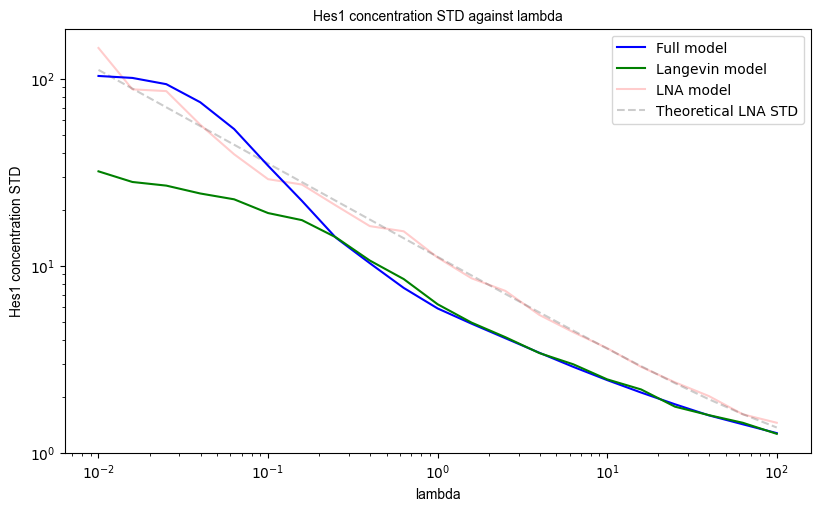

In [85]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Hes1 concentration STD against lambda',fontdict=font) 
ax1.set_xlabel('lambda',fontdict=font) 
ax1.set_ylabel('Hes1 concentration STD',fontdict=font)

linelna,=ax1.plot(val_lambda, arr_std_Plna, color = 'red', alpha = 0.2)
linet,=ax1.plot(val_lambda, arr_std_th_Plna,'--', color = 'black', alpha = 0.2)
linem,=ax1.plot(val_lambda, arr_std_Pm, color = 'blue')
linel,=ax1.plot(val_lambda, arr_std_Pl, color = 'green')

#ax1.fill_between(val_lambda, arr_std_Pm *(1- err_arr), arr_std_Pm *(1+ err_arr), color = 'blue', alpha = 0.1)
#ax1.fill_between(val_lambda, arr_std_Pl *(1- err_arr), arr_std_Pl *(1+ err_arr), color = 'green', alpha = 0.1)

ax1.tick_params(axis ='y') 
ax1.legend([linem, linel, linelna, linet], ['Full model', 'Langevin model', 'LNA model', 'Theoretical LNA STD'])
ax1.set_xscale('log')
ax1.set_yscale('log')        


#ax1.set_xlim(0, 0.15)
#ax1.set_ylim(10**6, 2*10**10)

plt.savefig(read_directory +'\\plots\\std-plots-Omega' + str(val_Omega[j]) + '-tau' + str(val_tau[k]) + '.pdf')  
plt.show()

In [75]:
arr_rel_Pl = abs(arr_std_Pm - arr_std_Pl)/arr_std_Pm
arr_rel_Plna = abs(arr_std_Pm - arr_std_Plna)/arr_std_Pm
arr_rel_th_Plna = abs(arr_std_Pm - arr_std_th_Plna)/arr_std_Pm

err_arr_rel = (1- err_arr)/(1+ err_arr)

In [76]:
arr_rel_smooth = np.zeros(n_lambda)
arr_rel_smooth[1:20] = (arr_rel_Pl[0:19] + arr_rel_Pl[1:20] + arr_rel_Pl[2:21])/3
arr_rel_smooth[0]    = (arr_rel_Pl[1] + arr_rel_Pl[0])/2
arr_rel_smooth[20]   = (arr_rel_Pl[20] + arr_rel_Pl[19])/2

In [77]:
def find_maxes(tab):
    l=len(tab)
    output_indices = []
    output_lambda = []
    output_tab = []
    
    index=0
    c=0
    while index<l-1:
        output_indices.append(index)
        output_lambda.append(val_lambda[index])
        output_tab.append(tab[index])
        c = np.argmax(tab[index+1:])
        index+=1+c
    
    output_indices.append(l-1)
    output_lambda.append(val_lambda[-1])
    output_tab.append(min(tab[-1], output_tab[-2]))

    return np.array(output_indices),np.array(output_lambda), np.array(output_tab)

arr_indices_maxes_Pl,arr_lambda_maxes_Pl,arr_rel_maxes_Pl = find_maxes(arr_rel_Pl)

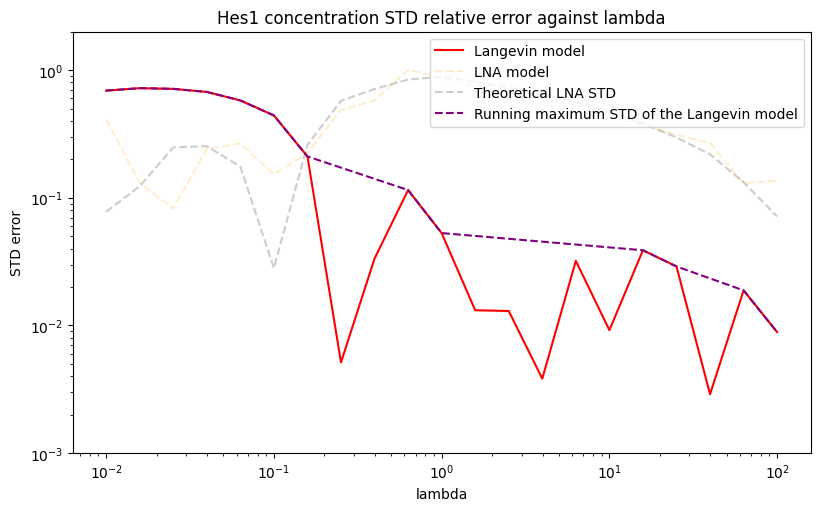

In [94]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Hes1 concentration STD relative error against lambda') 
ax1.set_xlabel('lambda') 
ax1.set_ylabel('STD error')


linel,=ax1.plot(val_lambda, arr_rel_Pl, color = 'red')
linelna,=ax1.plot(val_lambda, arr_rel_Plna, '--', color = 'orange', alpha = 0.2)
linet,=ax1.plot(val_lambda, arr_rel_th_Plna, '--', color = 'black', alpha = 0.2)

#ax1.fill_between(val_lambda, arr_rel_Pl*err_arr_rel, arr_rel_Pl/err_arr_rel, color = 'red', alpha = 0.1)

#ax1.plot(val_lambda, arr_rel_smooth, '--', color = 'purple')
#ax1.fill_between(val_lambda, arr_rel_smooth*err_arr_rel, arr_rel_smooth/err_arr_rel, color = 'purple', alpha = 0.1)

linemax, = ax1.plot(arr_lambda_maxes_Pl,arr_rel_maxes_Pl, '--', color = 'purple')
#ax1.fill_between(arr_lambda_maxes_Pl, arr_rel_maxes_Pl*err_arr_rel[arr_indices_maxes_Pl],
                                      #arr_rel_maxes_Pl/err_arr_rel[arr_indices_maxes_Pl],
                                      #color = 'purple', alpha = 0.1)

ax1.legend([linel, linelna, linet, linemax], ['Langevin model', 'LNA model', 'Theoretical LNA STD',
                                              'Running maximum STD of the Langevin model'], loc='upper right')


ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
ax1.set_yscale('log')        


#ax1.set_xlim(0, 0.15)
ax1.set_ylim(10**(-3), 2)

plt.savefig(read_directory +'\\plots\\error-std-plots-Omega' + str(val_Omega[j]) + '-tau' + str(val_tau[k]) + '.pdf')  
plt.show()